Objective on this project is to create cohort table to measure user engagement on the product over time with divide users by the behaviors they have taken in the app within a given time period. for this analysis, we will using purchase dataset to make a cohort.

# Load Data and Library

In [ ]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BI Bootcamp/Funnel & Cohort /Assignment Dini Chandradewi/purchase.csv')

# Data Quick Look

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


# Data Cleaning & Preparation

### Clean Missing Value

In [ ]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [ ]:
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18


In [ ]:
df[df['user_id'].isna()]
#data2 = data[~data['CustomerID'].isnull()].reset_index(drop = True)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
1812,2020-05-02 11:12:20 UTC,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN
3633,2020-05-06 07:37:55 UTC,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN
3918,2020-05-06 22:36:13 UTC,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN
6015,2020-05-10 09:41:54 UTC,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN
7802,2020-05-13 03:09:39 UTC,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN
...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56 UTC,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN
2632434,2020-11-19 05:38:31 UTC,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN
2632437,2020-11-19 11:21:22 UTC,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN
2632472,2020-11-19 09:54:22 UTC,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN


In [ ]:
df= data.dropna(subset=['user_id'])

In [ ]:
df.isnull().sum()

event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
dtype: int64

In [ ]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


now the missing value from `user_id` is clean, i decided to not clean the missing value on `category_code` and `brand` because we dont need that on our analysis

### Clean Duplicate Data

In [ ]:
df.duplicated().sum()

674

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,order_id,product_id,category_id,price,user_id
count,5.634950e+05,5.634950e+05,5.634950e+05,563495.000000,5.634950e+05
mean,2.370562e+18,1.695697e+18,2.272918e+18,208.326466,1.515916e+18
std,2.023809e+16,3.290594e+17,2.158409e+16,304.592653,2.376778e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18
25%,2.353295e+18,1.515966e+18,2.268105e+18,23.130000,1.515916e+18
50%,2.376896e+18,1.515966e+18,2.268105e+18,87.940000,1.515916e+18
75%,2.388441e+18,1.515966e+18,2.268105e+18,277.750000,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18


In [ ]:
df.shape

(563495, 8)

In [ ]:
df = df[(df['price']>0)]
df.describe() 

,order_id,product_id,category_id,price,user_id
count,5.634560e+05,5.634560e+05,5.634560e+05,563456.000000,5.634560e+05
mean,2.370563e+18,1.695670e+18,2.272919e+18,208.340886,1.515916e+18
std,2.023782e+16,3.290416e+17,2.158480e+16,304.598263,2.376764e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.020000,1.515916e+18
25%,2.353295e+18,1.515966e+18,2.268105e+18,23.130000,1.515916e+18
50%,2.376896e+18,1.515966e+18,2.268105e+18,87.940000,1.515916e+18
75%,2.388441e+18,1.515966e+18,2.268105e+18,277.750000,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18


In [ ]:
df.shape

(563456, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563456 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     563456 non-null  object 
 1   order_id       563456 non-null  int64  
 2   product_id     563456 non-null  int64  
 3   category_id    563456 non-null  float64
 4   category_code  434261 non-null  object 
 5   brand          536281 non-null  object 
 6   price          563456 non-null  float64
 7   user_id        563456 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 38.7+ MB


### Change Data Type

In [ ]:
df['event_time'] = df['event_time'].str.replace('UTC', ' ')

In [ ]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18


In [ ]:
#df['event_time'] = pd.to_datetime(df['event_time'])


### Get Date Table

In [ ]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563456 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     563456 non-null  object 
 1   order_id       563456 non-null  int64  
 2   product_id     563456 non-null  int64  
 3   category_id    563456 non-null  float64
 4   category_code  434261 non-null  object 
 5   brand          536281 non-null  object 
 6   price          563456 non-null  float64
 7   user_id        563456 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 38.7+ MB


In [ ]:
df['event_date'] = df['event_time'].str[:10:]

In [ ]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04-26
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04-26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563456 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     563456 non-null  object 
 1   order_id       563456 non-null  int64  
 2   product_id     563456 non-null  int64  
 3   category_id    563456 non-null  float64
 4   category_code  434261 non-null  object 
 5   brand          536281 non-null  object 
 6   price          563456 non-null  float64
 7   user_id        563456 non-null  float64
 8   event_date     563456 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 43.0+ MB


In [ ]:
df['event_date'].unique()

array(['2020-04-24', '2020-04-26', '2020-04-27', '2020-04-28',
       '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
       '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
       '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
       '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
       '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
       '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
       '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
       '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
       '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
       '2020-06-24', '2020-06-25', '2020-06-26', '1970-

there is one inpropriate data on date data, its '1970-01-01T00:00:00.000000000', so we need to clean it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563456 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     563456 non-null  object 
 1   order_id       563456 non-null  int64  
 2   product_id     563456 non-null  int64  
 3   category_id    563456 non-null  float64
 4   category_code  434261 non-null  object 
 5   brand          536281 non-null  object 
 6   price          563456 non-null  float64
 7   user_id        563456 non-null  float64
 8   event_date     563456 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 43.0+ MB


In [ ]:
df2 = df[df['event_date'].str.contains('1970-01-01') == False]

In [ ]:
df2

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04-26
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04-26
...,...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-21
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-21
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-21
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18,2020-11-21


In [ ]:
df2['event_date'] = pd.to_datetime(df2['event_date'])
df2['event_time'] = pd.to_datetime(df2['event_time'])

<ipython-input-31-4196c4788af2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['event_date'] = pd.to_datetime(df2['event_date'])
<ipython-input-31-4196c4788af2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['event_time'] = pd.to_datetime(df2['event_time'])


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562149 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_time     562149 non-null  datetime64[ns]
 1   order_id       562149 non-null  int64         
 2   product_id     562149 non-null  int64         
 3   category_id    562149 non-null  float64       
 4   category_code  433400 non-null  object        
 5   brand          535035 non-null  object        
 6   price          562149 non-null  float64       
 7   user_id        562149 non-null  float64       
 8   event_date     562149 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 42.9+ MB


In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])

# Cohort

**For cohort analysis, there are a few labels that we have to create:**

* Invoice period: A string representation of the year and month of a single transaction/invoice.

* Cohort group: A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.

* Cohort period / Cohort Index: A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.



In [ ]:
grouping = df2.groupby('user_id')['event_date']
df2['CohortMonth'] = grouping.transform('min')
df2.tail()

<ipython-input-34-e205df11940f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CohortMonth'] = grouping.transform('min')


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date,CohortMonth
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-21,2020-11-21
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-21,2020-11-21
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-21,2020-11-21
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18,2020-11-21,2020-11-21
2633520,2020-11-21 10:10:30,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18,2020-11-21,2020-11-21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563456 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_time     563456 non-null  datetime64[ns]
 1   order_id       563456 non-null  int64         
 2   product_id     563456 non-null  int64         
 3   category_id    563456 non-null  float64       
 4   category_code  434261 non-null  object        
 5   brand          536281 non-null  object        
 6   price          563456 non-null  float64       
 7   user_id        563456 non-null  float64       
 8   event_date     563456 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 43.0+ MB


In [ ]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df2,'event_date')
cohort_year,cohort_month,_ = get_month_int(df2,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df2['CohortIndex'] = year_diff * 12 + month_diff

<ipython-input-36-adfffbc9b328>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CohortIndex'] = year_diff * 12 + month_diff


In [ ]:
df2.head(50)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date,CohortMonth,CohortIndex
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,2020-04-24,0
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,2020-04-24,0
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,2020-04-24,0
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04-26,2020-04-26,0
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04-26,2020-03-20,1
10,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18,2020-04-26,2020-04-26,0
11,2020-04-26 23:35:39,2296164324487463110,1515966223509259473,2.268105e+18,appliances.personal.scales,polaris,30.07,1.515916e+18,2020-04-26,2020-04-26,0
12,2020-04-27 07:24:51,2296400480990920715,2273948308663698152,2.374499e+18,electronics.video.tv,samsung,416.64,1.515916e+18,2020-04-27,2020-04-27,0
13,2020-04-27 14:57:22,2296628237930857206,1515966223509089660,2.268105e+18,computers.components.cpu,intel,91.41,1.515916e+18,2020-04-27,2020-04-27,0
16,2020-04-28 02:21:45,2296972701060825130,1515966223509104683,2.268105e+18,NaN,philips,23.13,1.515916e+18,2020-04-28,2020-04-28,0


In [ ]:
df2[df2['CohortIndex']>0].head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date,CohortMonth,CohortIndex
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04-26,2020-03-20,1
17,2020-04-28 03:47:48,2297016008231092565,1515966223509089780,2.268105e+18,computers.notebook,asus,509.24,1.515916e+18,2020-04-28,2020-03-07,1
25,2020-04-29 03:25:12,2297729407910937541,1515966223509105105,2.268105e+18,NaN,sbs,0.02,1.515916e+18,2020-04-29,2020-02-13,2
32,2020-04-29 10:38:40,2297947579247231353,1515966223509881617,2.268105e+18,computers.components.memory,kingston,49.98,1.515916e+18,2020-04-29,2020-03-09,1
50,2020-04-29 12:27:02,2298002125248004522,2273948241915544394,2.268105e+18,electronics.smartphone,apple,346.97,1.515916e+18,2020-04-29,2020-02-11,2


note: this dataset have time value, so when we make cohort index if its not full 24hours different it maybe cant be count as a different day

In [ ]:
df2[df2['CohortIndex']>12]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date,CohortMonth,CohortIndex


In [ ]:
#Count monthly active customers from each cohort
df_temp = df2.copy()
df_temp['CohortMonth'] = df_temp['CohortMonth'].apply(lambda row:row.strftime('%Y-%m'))
grouping = df_temp.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)

In [ ]:
cohort_data

CohortMonth  CohortIndex
2020-01      0              1876
             1               648
             2               594
             3               483
             4               811
                            ... 
2020-09      1              1791
             2               743
2020-10      0              6073
             1               931
2020-11      0              3152
Name: user_id, Length: 66, dtype: int64

In [ ]:
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='user_id')
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10
CohortMonth,,,,,,,,,,,
2020-01,1876.0,648.0,594.0,483.0,811.0,804.0,718.0,780.0,685.0,443.0,319.0
2020-02,1673.0,533.0,399.0,688.0,682.0,637.0,671.0,587.0,342.0,289.0,NaN
2020-03,1530.0,387.0,653.0,648.0,565.0,610.0,546.0,321.0,211.0,NaN,NaN
2020-04,4336.0,1131.0,729.0,1011.0,997.0,715.0,491.0,276.0,NaN,NaN,NaN
2020-05,14573.0,2136.0,2687.0,2630.0,1759.0,1124.0,611.0,NaN,NaN,NaN,NaN
2020-06,9371.0,2198.0,1887.0,1261.0,819.0,471.0,NaN,NaN,NaN,NaN,NaN
2020-07,23334.0,5507.0,2534.0,1575.0,782.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,23482.0,3486.0,2072.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,8839.0,1791.0,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Retentoin Table**

In [ ]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,0,1,2,3,4,5,6,7,8,9,10
CohortMonth,,,,,,,,,,,
2020-01,100.0,34.5,31.7,25.7,43.2,42.9,38.3,41.6,36.5,23.6,17.0
2020-02,100.0,31.9,23.8,41.1,40.8,38.1,40.1,35.1,20.4,17.3,NaN
2020-03,100.0,25.3,42.7,42.4,36.9,39.9,35.7,21.0,13.8,NaN,NaN
2020-04,100.0,26.1,16.8,23.3,23.0,16.5,11.3,6.4,NaN,NaN,NaN
2020-05,100.0,14.7,18.4,18.0,12.1,7.7,4.2,NaN,NaN,NaN,NaN
2020-06,100.0,23.5,20.1,13.5,8.7,5.0,NaN,NaN,NaN,NaN,NaN
2020-07,100.0,23.6,10.9,6.7,3.4,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,100.0,14.8,8.8,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,100.0,20.3,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


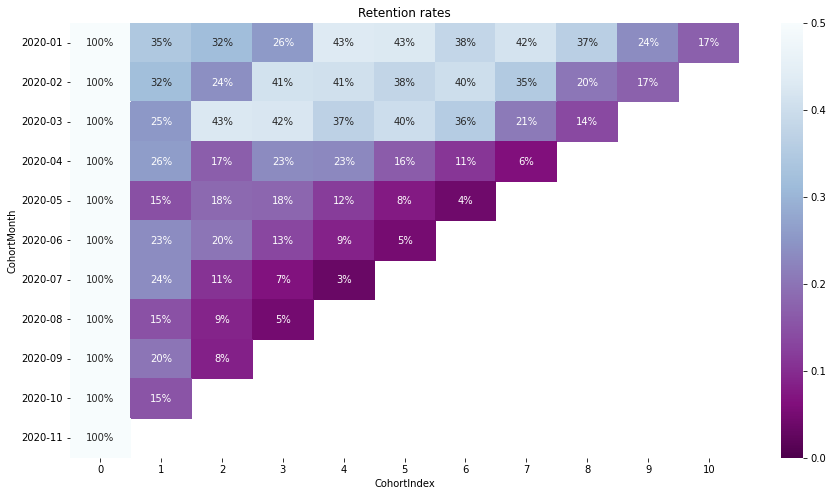

In [ ]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()